In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

import warnings
warnings.filterwarnings('ignore')

In [423]:
# Generate data
np.random.seed(42)
X = np.random.rand(100, 1) * 4.0 - 2.0       
y = np.sin(2.5 * X[:, 0]) + 0.3 * np.random.randn(100)

In [424]:
# Convert to DataFrame
df = pd.DataFrame({
    'X': X[:, 0],   # flatten the 2D array into 1D
    'y': y
})

In [425]:
print(df.shape)
df.head()

(100, 2)


,X,y
0,-0.501840,-0.924311
1,1.802857,-1.068713
2,0.927976,0.759801
3,0.394634,0.237877
4,-1.375925,0.227919


In [426]:
df['y'].mean()

0.04967800756760916

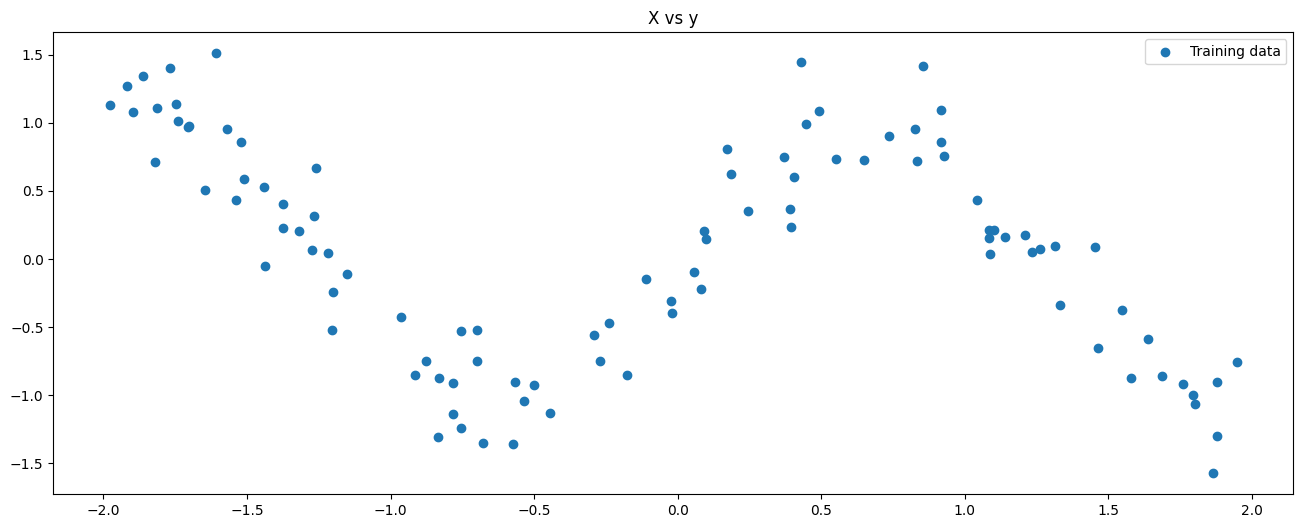

In [427]:
plt.figure(figsize=(16, 6))
plt.scatter(df['X'], df['y'], label='Training data')
plt.title('X vs y')
plt.legend()
plt.show()

In [428]:
# Step 1: Suppose Loss function is MSE then prediction for model1 is mean of y
df['y_pred0'] = df['y'].mean()
df.head(10)

,X,y,y_pred0
0,-0.501840,-0.924311,0.049678
1,1.802857,-1.068713,0.049678
2,0.927976,0.759801,0.049678
3,0.394634,0.237877,0.049678
4,-1.375925,0.227919,0.049678
5,-1.376022,0.401184,0.049678
6,-1.767666,1.400685,0.049678
7,1.464705,-0.652508,0.049678
8,0.404460,0.604895,0.049678
9,0.832290,0.722252,0.049678


In [429]:
# Step 2: Calculate the error(residual), residual = actual - predicted
df['res1'] = df['y'] - df['y_pred0']
df.head(10)

,X,y,y_pred0,res1
0,-0.501840,-0.924311,0.049678,-0.973989
1,1.802857,-1.068713,0.049678,-1.118391
2,0.927976,0.759801,0.049678,0.710123
3,0.394634,0.237877,0.049678,0.188199
4,-1.375925,0.227919,0.049678,0.178241
5,-1.376022,0.401184,0.049678,0.351506
6,-1.767666,1.400685,0.049678,1.351007
7,1.464705,-0.652508,0.049678,-0.702186
8,0.404460,0.604895,0.049678,0.555217
9,0.832290,0.722252,0.049678,0.672574


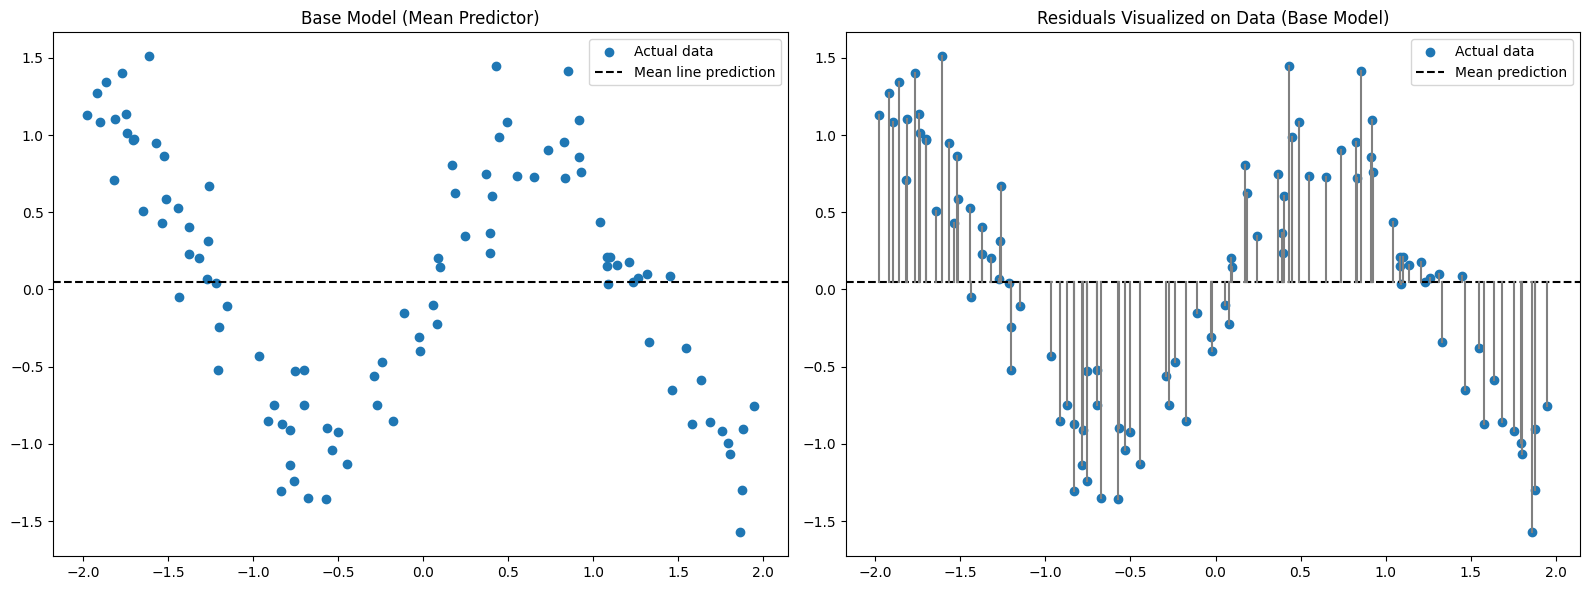

In [430]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(df['X'], df['y'], label='Actual data')
axes[0].axhline(df['y'].mean(), color='black', linestyle='--', label='Mean line prediction')
axes[0].set_title('Base Model (Mean Predictor)')
axes[0].legend()

axes[1].scatter(df['X'], df['y'], label='Actual data')
axes[1].axhline(df['y'].mean(), color='black', linestyle='--', label='Mean prediction')

for i in range(len(df)):
    axes[1].plot([df['X'][i], df['X'][i]], [df['y_pred0'][i], df['y'][i]], color='gray')
axes[1].set_title('Residuals Visualized on Data (Base Model)')
axes[1].legend()

plt.tight_layout()
plt.show()



In [431]:
# Now, Train model2 uaing X and target as (res1) insted of y
t1 = DecisionTreeRegressor(max_depth=2)

t1.fit(df['X'].values.reshape(100,1), df['res1'].values)

DecisionTreeRegressor(max_depth=2)

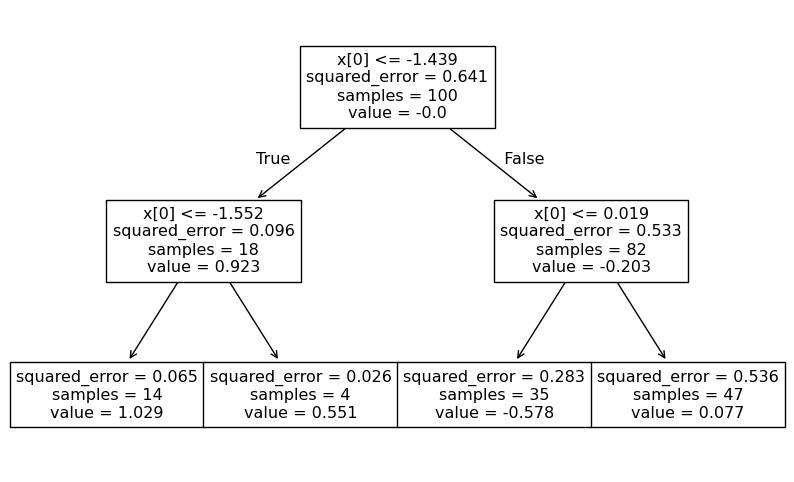

In [432]:
plt.figure(figsize=(10, 6))
plot_tree(t1)
plt.show()

In [433]:
X_test = np.linspace(-2, 2, 500).reshape(-1, 1)
y_pred = t1.predict(X_test)

In [434]:
df['y_pred1'] = t1.predict(np.linspace(-2, 2, 100).reshape(-1, 1))

In [435]:
# Learning rate default = 0.3
eta = 1

# Updated prediction after model1
df['y_pred1_final'] = df['y_pred0'] + eta * t1.predict(df[['X']])

In [436]:
df['res2'] = df['y'] - df['y_pred1_final']
df.head(10)

,X,y,y_pred0,res1,y_pred1,y_pred1_final,res2
0,-0.501840,-0.924311,0.049678,-0.973989,1.029226,-0.528116,-0.396195
1,1.802857,-1.068713,0.049678,-1.118391,1.029226,0.126495,-1.195208
2,0.927976,0.759801,0.049678,0.710123,1.029226,0.126495,0.633306
3,0.394634,0.237877,0.049678,0.188199,1.029226,0.126495,0.111382
4,-1.375925,0.227919,0.049678,0.178241,1.029226,-0.528116,0.756034
5,-1.376022,0.401184,0.049678,0.351506,1.029226,-0.528116,0.929300
6,-1.767666,1.400685,0.049678,1.351007,1.029226,1.078904,0.321781
7,1.464705,-0.652508,0.049678,-0.702186,1.029226,0.126495,-0.779003
8,0.404460,0.604895,0.049678,0.555217,1.029226,0.126495,0.478400
9,0.832290,0.722252,0.049678,0.672574,1.029226,0.126495,0.595757


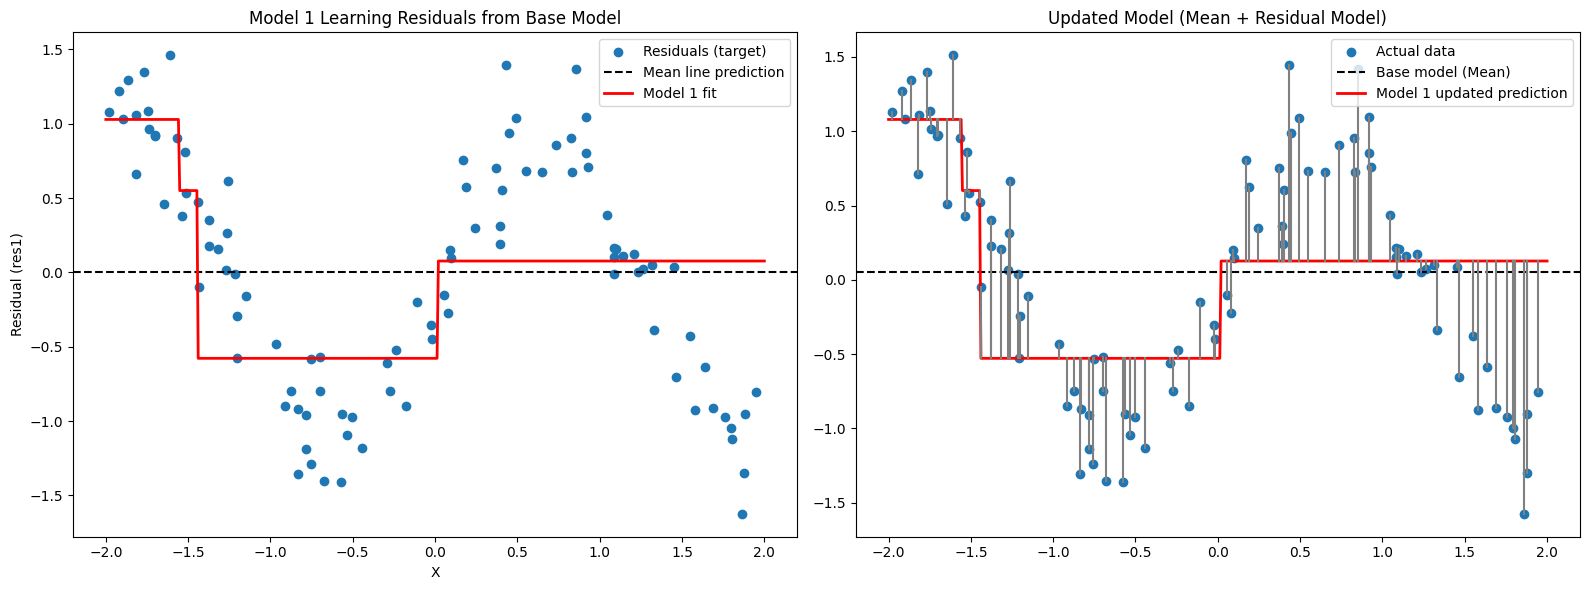

In [437]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(df['X'], df['res1'], label='Residuals (target)')
axes[0].axhline(0, color='black', linestyle='--', label='Mean line prediction')
axes[0].plot(X_test, y_pred, color='red', linewidth=2, label='Model 1 fit')
axes[0].set_title('Model 1 Learning Residuals from Base Model')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Residual (res1)')
axes[0].legend()

axes[1].scatter(df['X'], df['y'], label='Actual data')
axes[1].axhline(df['y'].mean(), color='black', linestyle='--', label='Base model (Mean)')
axes[1].plot(X_test, df['y'].mean() + y_pred, color='red', linewidth=2, label='Model 1 updated prediction')

for i in range(len(df)):
    axes[1].plot([df['X'][i], df['X'][i]], [df['y_pred1_final'][i], df['y'][i]], color='gray')

axes[1].set_title('Updated Model (Mean + Residual Model)')
axes[1].legend()

plt.tight_layout()
plt.show()

In [438]:
# Now, Train model3 uaing X and target as (res2) insted of y
t2 = DecisionTreeRegressor(max_depth=2)

t2.fit(df['X'].values.reshape(100,1), df['res2'].values)

DecisionTreeRegressor(max_depth=2)

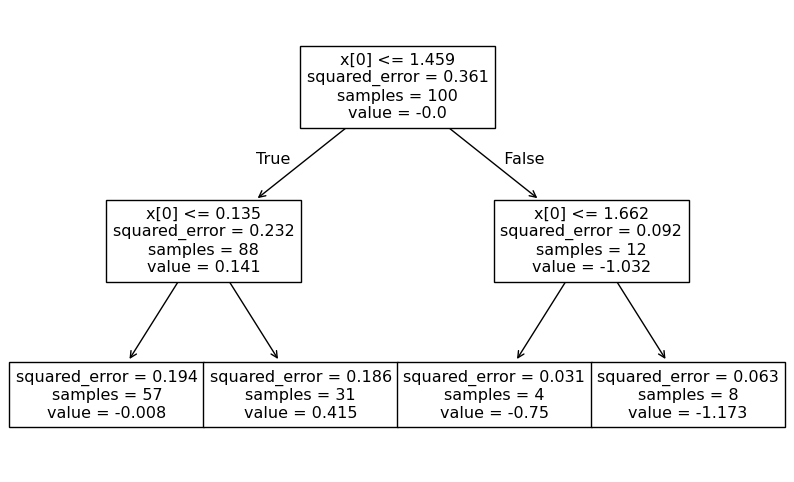

In [439]:
plt.figure(figsize=(10, 6))
plot_tree(t2)
plt.show()

In [440]:
X_test2 = np.linspace(-2, 2, 500).reshape(-1, 1)
y_pred2 = t2.predict(X_test2)

In [441]:
df['y_pred2'] = t2.predict(np.linspace(-2, 2, 100).reshape(-1, 1))

In [442]:
# Learning rate default = 0.3
eta = 1

# Updated prediction after model2
df['y_pred2_final'] = df['y_pred1_final'] + eta * t2.predict(df[['X']])

In [443]:
df['res3'] = df['y'] - df['y_pred2_final']
df.head(10)

,X,y,y_pred0,res1,y_pred1,y_pred1_final,res2,y_pred2,y_pred2_final,res3
0,-0.501840,-0.924311,0.049678,-0.973989,1.029226,-0.528116,-0.396195,-0.008369,-0.536485,-0.387826
1,1.802857,-1.068713,0.049678,-1.118391,1.029226,0.126495,-1.195208,-0.008369,-1.046496,-0.022217
2,0.927976,0.759801,0.049678,0.710123,1.029226,0.126495,0.633306,-0.008369,0.541318,0.218483
3,0.394634,0.237877,0.049678,0.188199,1.029226,0.126495,0.111382,-0.008369,0.541318,-0.303441
4,-1.375925,0.227919,0.049678,0.178241,1.029226,-0.528116,0.756034,-0.008369,-0.536485,0.764403
5,-1.376022,0.401184,0.049678,0.351506,1.029226,-0.528116,0.929300,-0.008369,-0.536485,0.937669
6,-1.767666,1.400685,0.049678,1.351007,1.029226,1.078904,0.321781,-0.008369,1.070535,0.330150
7,1.464705,-0.652508,0.049678,-0.702186,1.029226,0.126495,-0.779003,-0.008369,-0.623143,-0.029365
8,0.404460,0.604895,0.049678,0.555217,1.029226,0.126495,0.478400,-0.008369,0.541318,0.063577
9,0.832290,0.722252,0.049678,0.672574,1.029226,0.126495,0.595757,-0.008369,0.541318,0.180934


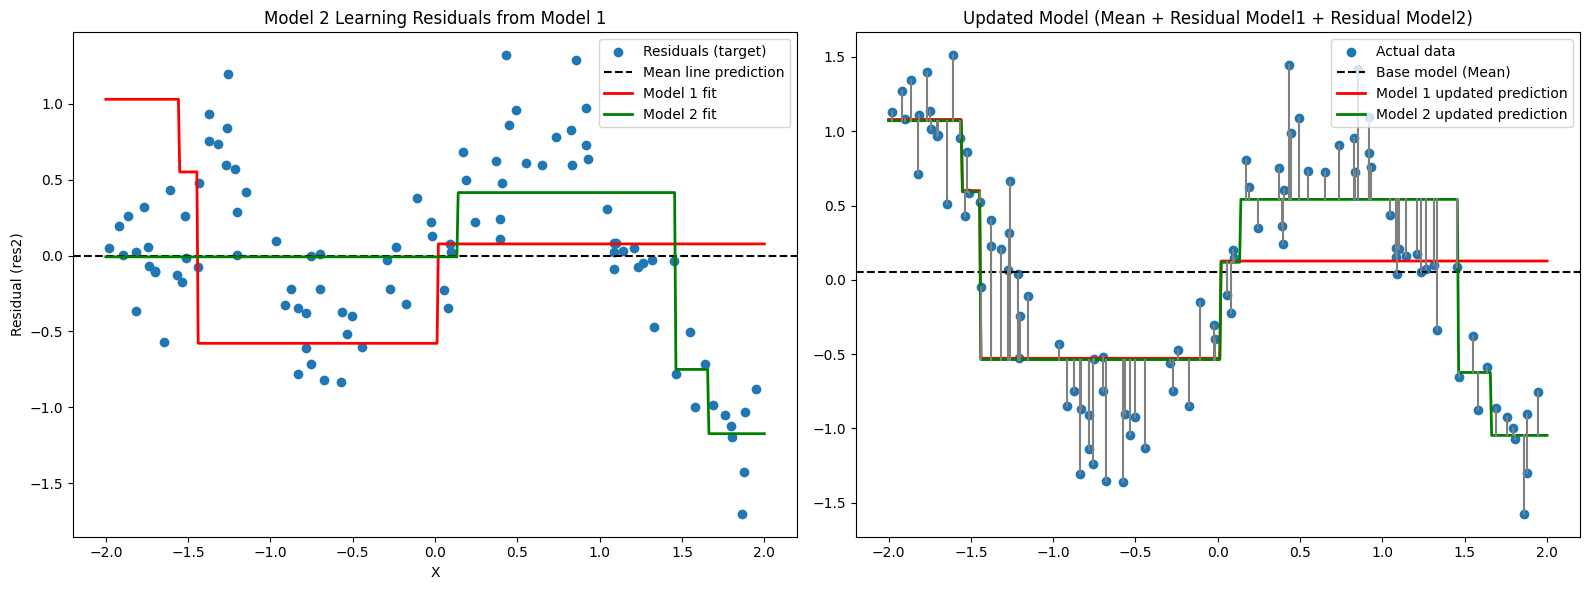

In [444]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(df['X'], df['res2'], label='Residuals (target)')
axes[0].axhline(0, color='black', linestyle='--', label='Mean line prediction')
axes[0].plot(X_test, y_pred, color='red', linewidth=2, label='Model 1 fit')
axes[0].plot(X_test2, y_pred2, color='green', linewidth=2, label='Model 2 fit')

axes[0].set_title('Model 2 Learning Residuals from Model 1')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Residual (res2)')
axes[0].legend()

axes[1].scatter(df['X'], df['y'], label='Actual data')
axes[1].axhline(df['y'].mean(), color='black', linestyle='--', label='Base model (Mean)')
axes[1].plot(X_test, df['y'].mean() + y_pred, color='red', linewidth=2, label='Model 1 updated prediction')
axes[1].plot(X_test2, df['y'].mean() + y_pred + y_pred2, color='green', linewidth=2, label='Model 2 updated prediction')


for i in range(len(df)):
    axes[1].plot([df['X'][i], df['X'][i]], [df['y_pred2_final'][i], df['y'][i]], color='gray')

axes[1].set_title('Updated Model (Mean + Residual Model1 + Residual Model2)')
axes[1].legend()

plt.tight_layout()
plt.show()

In [445]:
# Now, Train model4 uaing X and target as (res2) insted of y
t3 = DecisionTreeRegressor(max_depth=2)

t3.fit(df['X'].values.reshape(100,1), df['res3'].values)

DecisionTreeRegressor(max_depth=2)

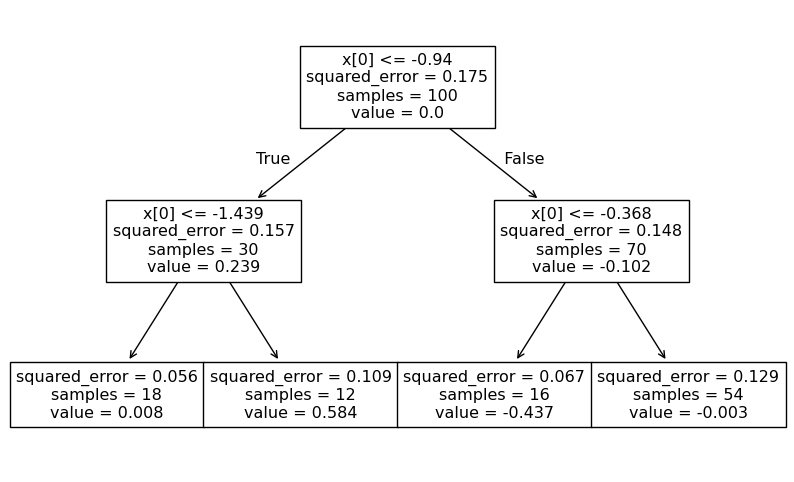

In [446]:
plt.figure(figsize=(10, 6))
plot_tree(t3)
plt.show()

In [447]:
X_test3 = np.linspace(-2, 2, 500).reshape(-1, 1)
y_pred3 = t3.predict(X_test3)

In [448]:
df['y_pred3'] = t3.predict(np.linspace(-2, 2, 100).reshape(-1, 1))

In [449]:
# Learning rate default = 0.3
eta = 1

# Updated prediction after model2
df['y_pred3_final'] = df['y_pred2_final'] + eta * t3.predict(df[['X']])

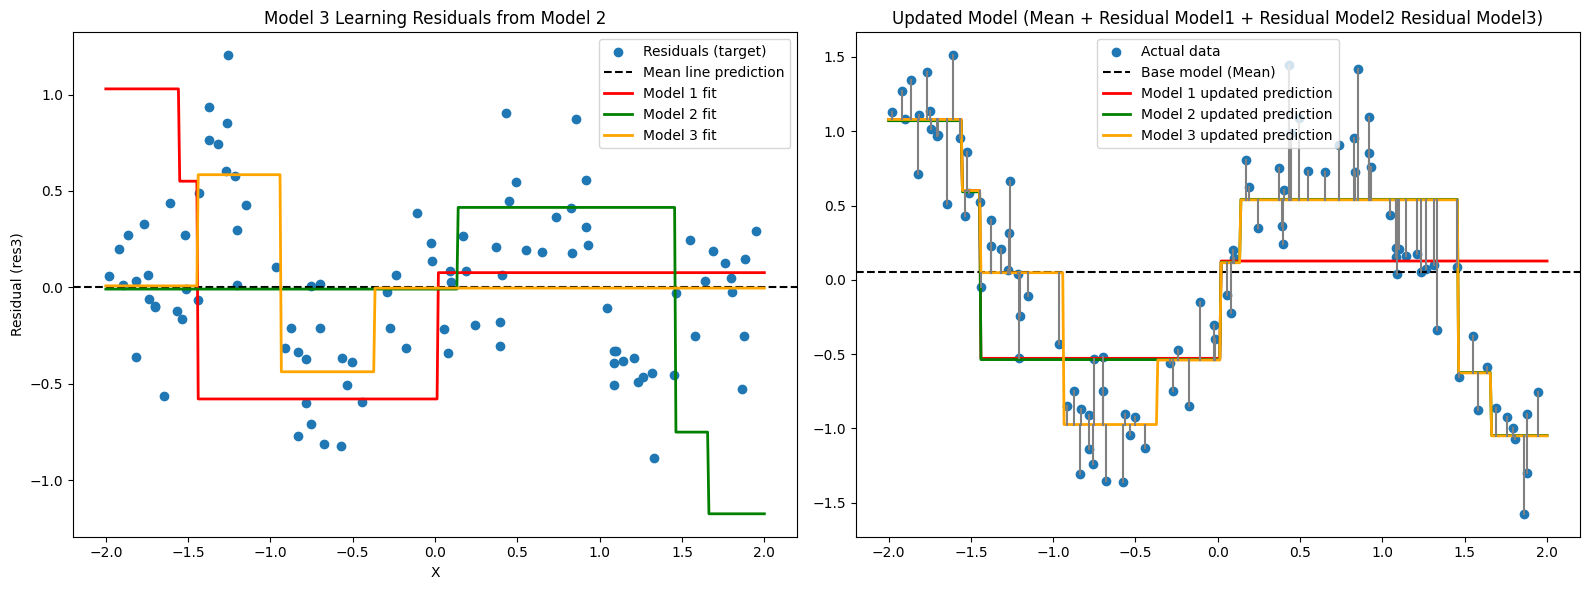

In [450]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(df['X'], df['res3'], label='Residuals (target)')
axes[0].axhline(0, color='black', linestyle='--', label='Mean line prediction')
axes[0].plot(X_test, y_pred, color='red', linewidth=2, label='Model 1 fit')
axes[0].plot(X_test2, y_pred2, color='green', linewidth=2, label='Model 2 fit')
axes[0].plot(X_test3, y_pred3, color='orange', linewidth=2, label='Model 3 fit')


axes[0].set_title('Model 3 Learning Residuals from Model 2')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Residual (res3)')
axes[0].legend()

axes[1].scatter(df['X'], df['y'], label='Actual data')
axes[1].axhline(df['y'].mean(), color='black', linestyle='--', label='Base model (Mean)')
axes[1].plot(X_test, df['y'].mean() + y_pred, color='red', linewidth=2, label='Model 1 updated prediction')
axes[1].plot(X_test2, df['y'].mean() + y_pred + y_pred2, color='green', linewidth=2, label='Model 2 updated prediction')
axes[1].plot(X_test3, df['y'].mean() + y_pred + y_pred2 + y_pred3, color='orange', linewidth=2, label='Model 3 updated prediction')

for i in range(len(df)):
    axes[1].plot([df['X'][i], df['X'][i]], [df['y_pred3_final'][i], df['y'][i]], color='gray')

axes[1].set_title('Updated Model (Mean + Residual Model1 + Residual Model2 Residual Model3)')
axes[1].legend()

plt.tight_layout()
plt.show()

In [451]:
df['res4'] = df['y'] - df['y_pred3_final']
df

,X,y,y_pred0,res1,y_pred1,y_pred1_final,res2,y_pred2,y_pred2_final,res3,y_pred3,y_pred3_final,res4
0,-0.501840,-0.924311,0.049678,-0.973989,1.029226,-0.528116,-0.396195,-0.008369,-0.536485,-0.387826,0.008369,-0.973355,0.049044
1,1.802857,-1.068713,0.049678,-1.118391,1.029226,0.126495,-1.195208,-0.008369,-1.046496,-0.022217,0.008369,-1.049725,-0.018988
2,0.927976,0.759801,0.049678,0.710123,1.029226,0.126495,0.633306,-0.008369,0.541318,0.218483,0.008369,0.538089,0.221712
3,0.394634,0.237877,0.049678,0.188199,1.029226,0.126495,0.111382,-0.008369,0.541318,-0.303441,0.008369,0.538089,-0.300212
4,-1.375925,0.227919,0.049678,0.178241,1.029226,-0.528116,0.756034,-0.008369,-0.536485,0.764403,0.008369,0.047984,0.179934
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.024818,-0.306747,0.049678,-0.356425,0.076817,-0.528116,0.221369,-1.172991,-0.536485,0.229738,-0.003229,-0.539714,0.232966
96,0.090931,0.202245,0.049678,0.152567,0.076817,0.126495,0.075750,-1.172991,0.118126,0.084119,-0.003229,0.114897,0.087348
97,-0.289836,-0.560483,0.049678,-0.610161,0.076817,-0.528116,-0.032367,-1.172991,-0.536485,-0.023998,-0.003229,-0.539714,-0.020769
98,-1.898323,1.082449,0.049678,1.032771,0.076817,1.078904,0.003545,-1.172991,1.070535,0.011914,-0.003229,1.078904,0.003545


In [452]:
print("Variance of Each Model’s Predictions (How Much Each Learns)")
print("Var(Model 1 predictions):", np.var(y_pred))
print("Var(Model 2 predictions):", np.var(y_pred2))
print("Var(Model 3 predictions):", np.var(y_pred3))

print("\nResidual Variance After Each Stage (How Much Error Remains)")
print("Var(res1):", np.var(df['res1']))
print("Var(res2):", np.var(df['res2']))
print("Var(res3):", np.var(df['res3']))
print("Var(res4):", np.var(df['res4']))


Variance of Each Model’s Predictions (How Much Each Learns)
Var(Model 1 predictions): 0.24985995609801567
Var(Model 2 predictions): 0.20321383529051007
Var(Model 3 predictions): 0.07004144022631716

Residual Variance After Each Stage (How Much Error Remains)
Var(res1): 0.6408843137043259
Var(res2): 0.36082648213286794
Var(res3): 0.17489146034023204
Var(res4): 0.1033438784069825


In this notebook, we trained three sequential models following the gradient boosting approach, where each model was fitted on the residuals of the previous stage to iteratively improve the overall prediction. The same procedure can be repeated for additional boosting rounds by continuing to compute new residuals, fit new learners, and update the predictions. However, in practice, training is usually stopped when a predefined criterion is met — such as reaching a maximum number of iterations, observing minimal improvement in validation loss, or detecting that the model begins to overfit.

---